Mean Absolute Error (MAE): 970043.403920164
Mean Squared Error (MSE): 1754318687330.6643
R² Score: 0.6529242642153184

Model Coefficients:
                                   Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


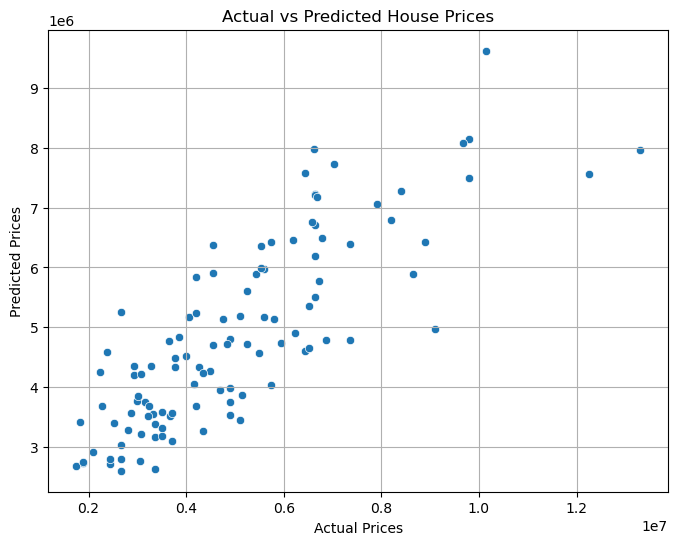

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load the dataset
# Replace the path below with your local file path if necessary
df = pd.read_csv('Housing.csv')

# Step 3: Preprocess the data
# Convert categorical features into dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Step 4: Define features and target
X = df.drop('price', axis=1)  # Independent variables
y = df['price']               # Dependent variable

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict on test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Step 9: Coefficient interpretation
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:\n", coefficients)

# Step 10: Plotting actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()
